# Training a model that predicts Air Quality Index Classifications

## Classifications are as such:<br>
* Good
* Moderate
* Unhealthy f. Sens. G.
* Unhealthy
* Very Unhealthy
* Hazardous

In [1]:
# Import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import functions.uap as uap

In [2]:
# Load the dataset
air_df = uap.get_data()

In [9]:
air_df.head()

Place_ID X Date       Date Place_ID  target target_aqi target_health   
0  010Q650 X 2020-01-02 2020-01-02  010Q650    38.0       Good       Healthy  \
1  010Q650 X 2020-01-03 2020-01-03  010Q650    39.0       Good       Healthy   
2  010Q650 X 2020-01-04 2020-01-04  010Q650    24.0       Good       Healthy   
3  010Q650 X 2020-01-05 2020-01-05  010Q650    49.0       Good       Healthy   
4  010Q650 X 2020-01-06 2020-01-06  010Q650    21.0       Good       Healthy   

   target_min  target_max  target_variance  target_count  ...   
0        23.0        53.0           769.50            92  ...  \
1        25.0        63.0          1319.85            91  ...   
2         8.0        56.0          1181.96            96  ...   
3        10.0        55.0          1113.67            96  ...   
4         9.0        52.0          1164.82            95  ...   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle   
0                  -61.752587                  22.363665  \
1                  -67.693509                  28.614804   
2                  -78.342701                  34.296977   
3                  -73.896588                  30.545446   
4                  -68.612480                  26.899694   

   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
0                                    1793.793579            3227.855469  \
1                                    1789.960449            3384.226562   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                            NaN                    NaN   

   L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle   
0                      0.010579                    74.481049  \
1                      0.015104                    75.630043   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   L3_CH4_sensor_zenith_angle  L3_CH4_solar_azimuth_angle   
0                   37.501499                  -62.142639  \
1                   55.657486                  -53.868134   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   L3_CH4_solar_zenith_angle  day_of_year  
0                  22.545118            2  
1                  19.293652            3  
2                        NaN            4  
3                        NaN            5  
4                        NaN            6  

[5 rows x 85 columns]

In [18]:
air_df.describe()

Date        target    target_min   
count                          30557  30557.000000  30557.000000  \
mean   2020-02-17 11:32:35.807180032     61.148045     29.025866   
min              2020-01-02 00:00:00      1.000000      1.000000   
25%              2020-01-25 00:00:00     25.000000      5.000000   
50%              2020-02-17 00:00:00     50.000000     15.000000   
75%              2020-03-12 00:00:00     80.000000     44.000000   
max              2020-04-04 00:00:00    815.000000    438.000000   
std                              NaN     46.861309     33.119775   

         target_max  target_variance  target_count   
count  30557.000000     3.055700e+04  30557.000000  \
mean     117.992234     7.983756e+03    125.831135   
min        1.000000     0.000000e+00      2.000000   
25%       60.000000     1.064920e+03     44.000000   
50%       91.000000     2.395350e+03     72.000000   
75%      155.000000     5.882550e+03    150.000000   
max      999.000000     1.841490e+06   1552.000000   
std      100.417713     4.863090e+04    146.581856   

       precipitable_water_entire_atmosphere   
count                          30557.000000  \
mean                              15.302326   
min                                0.420044   
25%                                7.666667   
50%                               12.200000   
75%                               19.900000   
max                               72.599998   
std                               10.688573   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   
std                            18.807884                           0.003787   

       temperature_2m_above_ground  ...  L3_SO2_solar_azimuth_angle   
count                 30557.000000  ...                23320.000000  \
mean                      9.321342  ...                 -123.697777   
min                     -34.647879  ...                 -179.880630   
25%                       3.123071  ...                 -165.882624   
50%                       8.478424  ...                 -156.637162   
75%                      16.201563  ...                 -118.453598   
max                      37.437921  ...                  179.776125   
std                       9.343226  ...                   71.916036   

       L3_SO2_solar_zenith_angle   
count               23320.000000  \
mean                   46.533951   
min                     0.000000   
25%                    36.693094   
50%                    47.445010   
75%                    57.438181   
max                    79.631711   
std                    14.594267   

       L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
count                                    5792.000000            5792.000000  \
mean                                      923.231949            1711.793613   
min                                         0.000000               0.000000   
25%                                         0.000000               0.000000   
50%                                         0.000000               0.000000   
75%                                      1861.674119            3393.541633   
max                                      2112.522949            6478.550544   
std                                       929.633988            1741.299304   

       L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle   
count                   5792.000000                

In [3]:
air_df_selected = uap.select_and_rename_columns(air_df, "target_aqi")

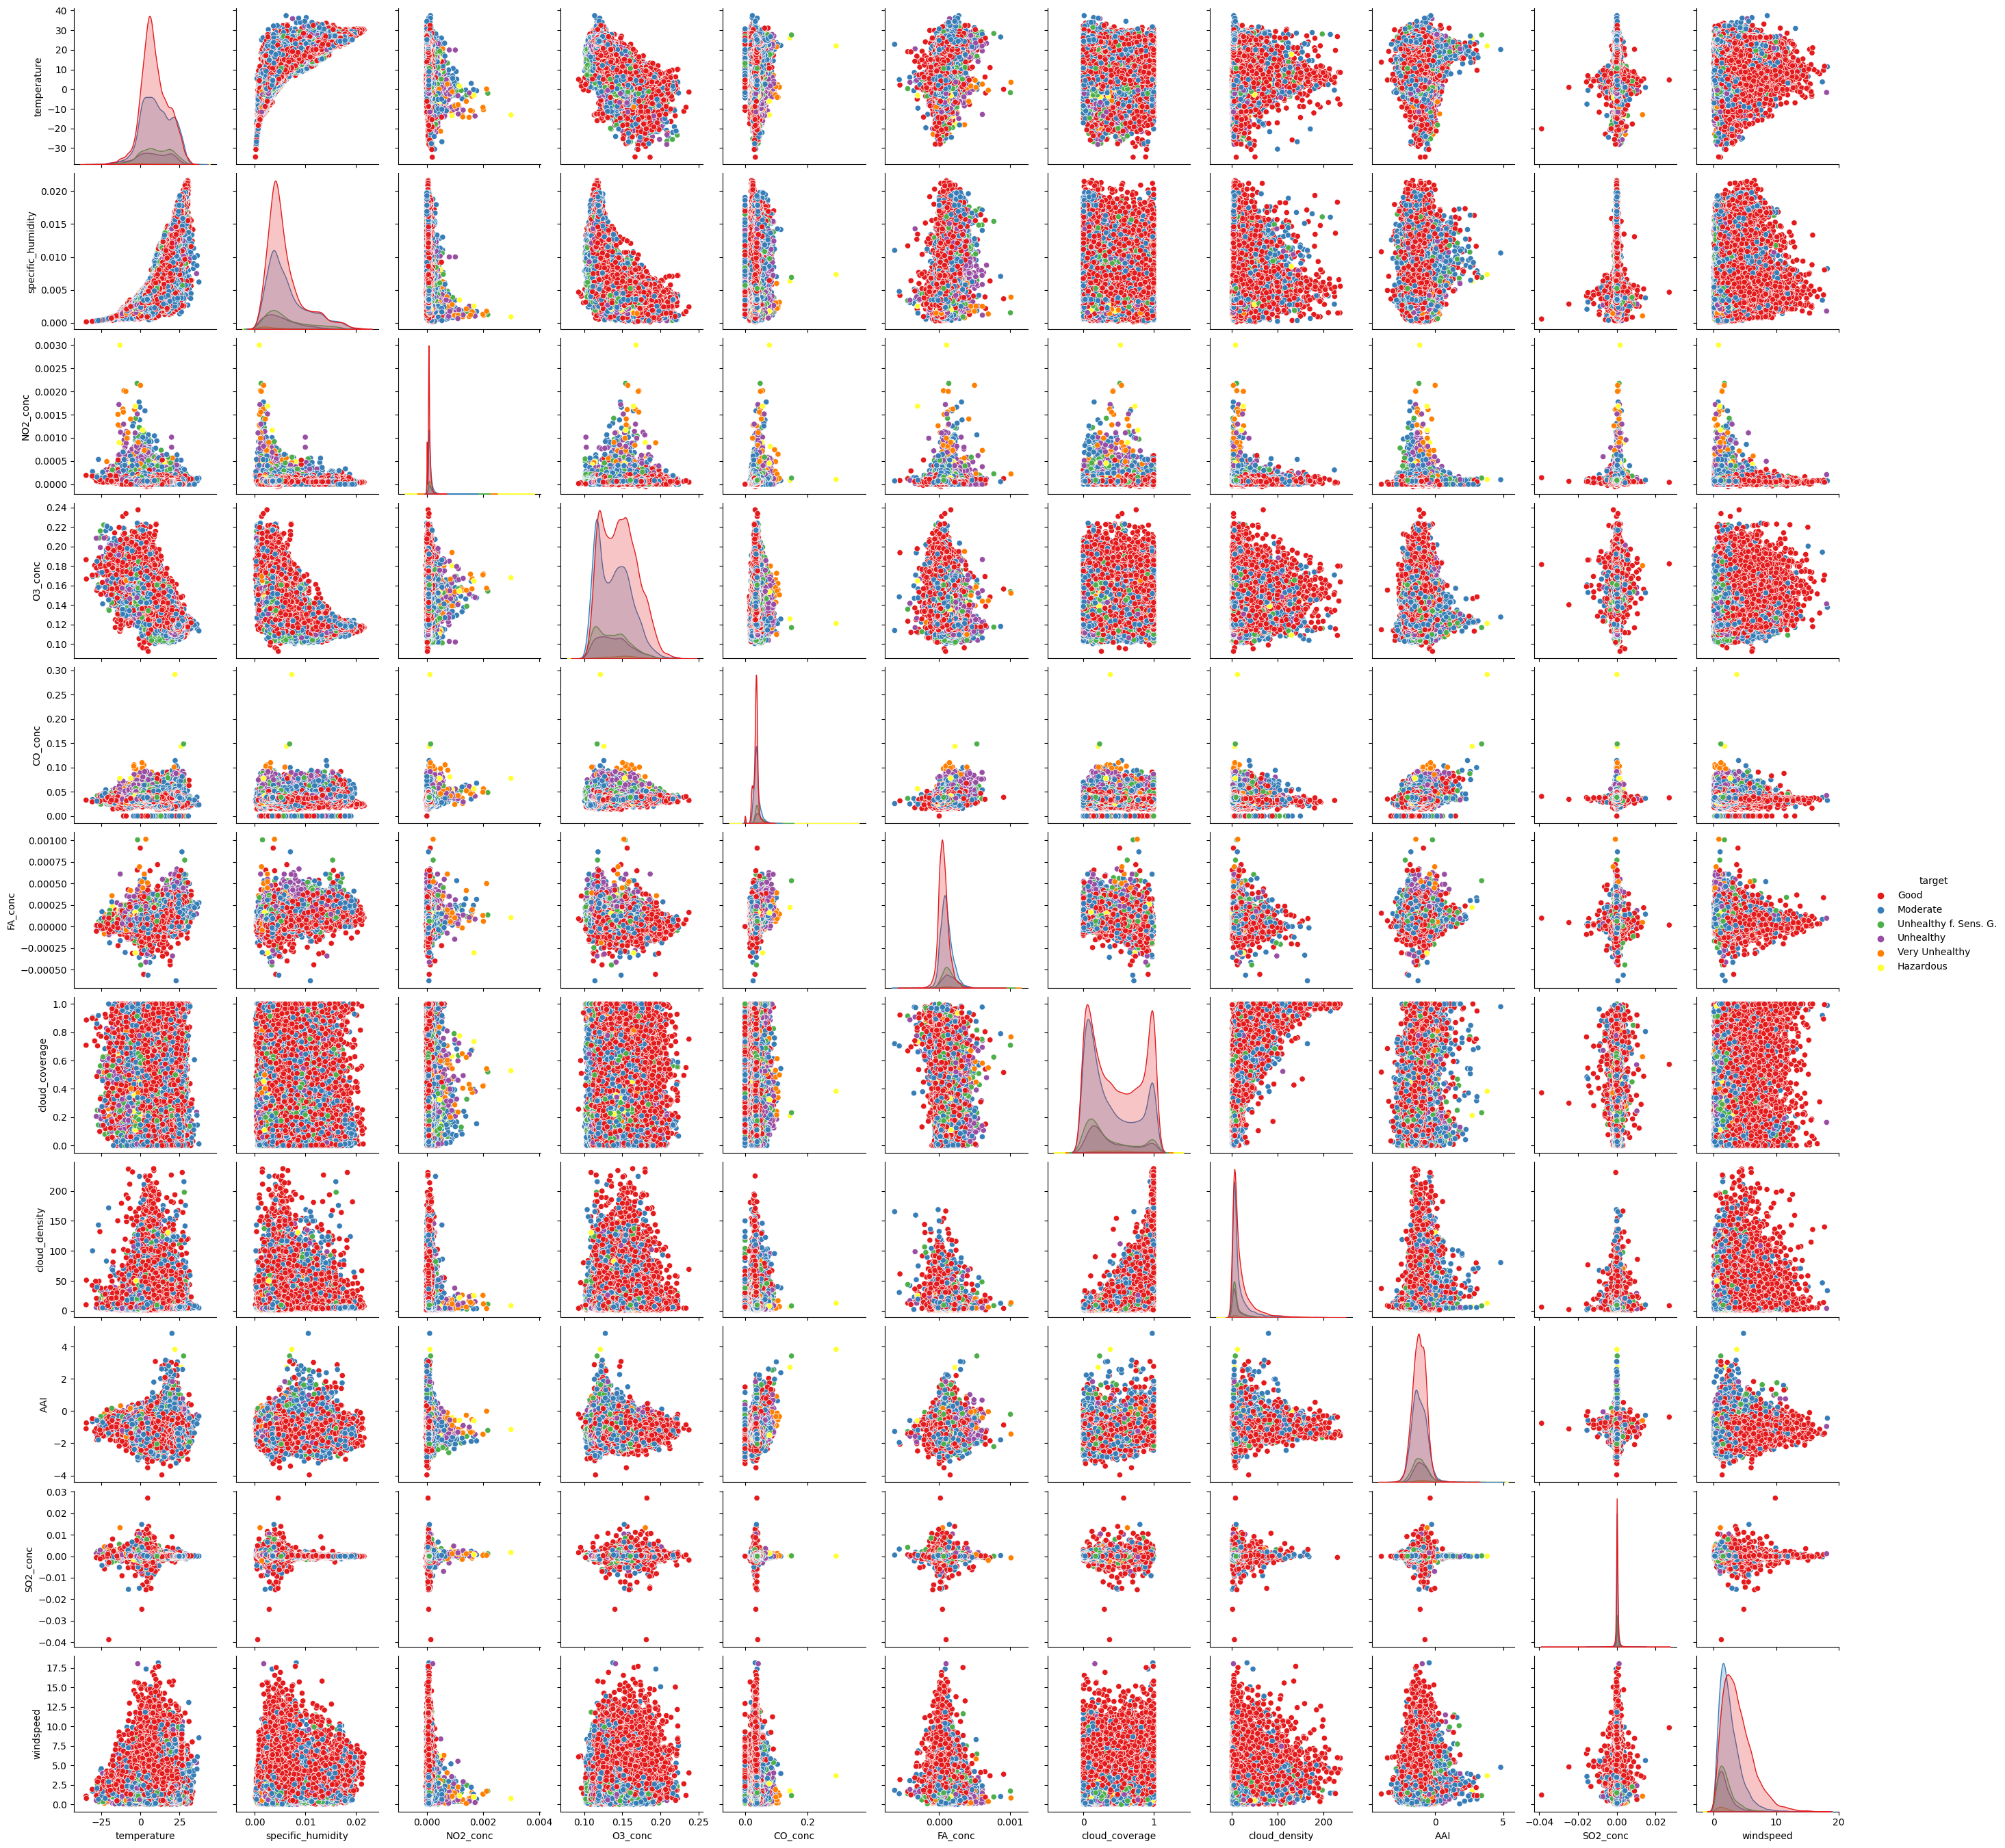

In [30]:
sns.pairplot(air_df_selected, hue="target", palette="Set1")

In [4]:
# Preprocessing the data
## Statistics
air_df_selected.describe()

temperature  specific_humidity      NO2_conc       O3_conc   
count  30557.000000       30557.000000  28368.000000  29621.000000  \
mean       9.321342           0.006004      0.000094      0.142609   
std        9.343226           0.003787      0.000094      0.022644   
min      -34.647879           0.000139     -0.000051      0.092600   
25%        3.123071           0.003403      0.000056      0.122659   
50%        8.478424           0.004912      0.000075      0.141580   
75%       16.201563           0.007562      0.000111      0.158361   
max       37.437921           0.021615      0.002998      0.237652   

            CO_conc       FA_conc  cloud_coverage  cloud_density   
count  25134.000000  23132.000000    30183.000000   29035.000000  \
mean       0.036230      0.000088        0.433513      18.201564   
std        0.010909      0.000094        0.350953      23.790555   
min        0.000000     -0.000630        0.000000       1.000000   
25%        0.031181      0.000028        0.112687       5.195713   
50%        0.035563      0.000076        0.340757       8.520578   
75%        0.039797      0.000134        0.771836      21.040006   
max        0.291536      0.001015        1.000000     237.121177   

                AAI      SO2_conc     windspeed  
count  30360.000000  23320.000000  30557.000000  
mean      -1.161213      0.000113      3.100731  
std        0.538363      0.000899      2.209016  
min       -3.967332     -0.038756      0.020040  
25%       -1.517307     -0.000107      1.497562  
50%       -1.179243      0.000056      2.545925  
75%       -0.817034      0.000280      4.152956  
max        4.824804      0.026994     18.160623

In [5]:
## Assign the target and features variables
X = air_df_selected.copy().drop(columns=["target"], axis=1)
y = air_df_selected["target"]
## Encode y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y) 
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


In [ ]:
## Building a pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()), 
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression()) #placeholder
])

param_grid = [
    {
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.1, 1, 10], #Regularisation strength
        'clf__solver': ['lbfgs'] #Optimizes algorithm
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200], #Number of trees
        'clf__max_depth': [10, 5] #Maximum depth of the tree
    },
    {
        'clf': [XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')],
        'clf__n_estimators': [100], #Number of trees
        'clf__max_depth': [3, 5],#Maximum depth of the tree
        'clf__learning_rate': [0.1] #Learning rate
    }
]

In [ ]:
# Perform a grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Show results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to it

Best parameters: {'clf': RandomForestClassifier(), 'clf__max_depth': 10, 'clf__n_estimators': 200}
Best cross-validation score: 0.629003886275312


--- Test data ---
                       precision    recall  f1-score   support

                 Good       0.69      0.85      0.76      3071
             Moderate       0.00      0.00      0.00         8
Unhealthy f. Sens. G.       0.52      0.53      0.52      2053
            Unhealthy       0.56      0.33      0.42       411
       Very Unhealthy       0.33      0.02      0.04       525
            Hazardous       0.00      0.00      0.00        44

             accuracy                           0.63      6112
            macro avg       0.35      0.29      0.29      6112
         weighted avg       0.59      0.63      0.59      6112

--- Train data ---
                       precision    recall  f1-score   support

                 Good       0.75      0.92      0.83     12282
             Moderate       1.00      0.07      0.12        30
Unhealthy f. Sens. G.       0.66      0.65      0.65      8212
            Unhealthy       0.82      0.46      0.59      1645
       Very Un

/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

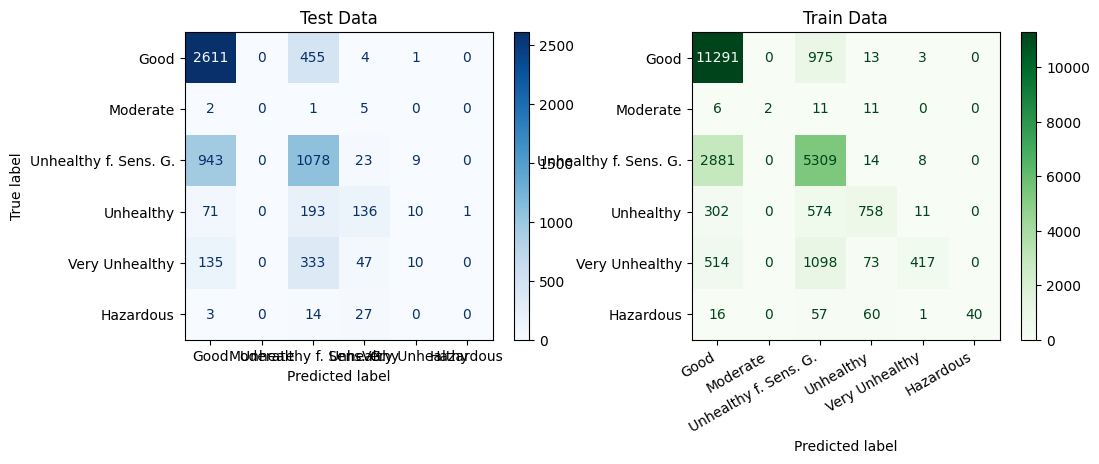

In [ ]:
# Evaluate the model
y_con, y_labels = pd.factorize(air_df_selected["target"])
uap.check_classification(grid_search, X_train, X_test, y_train, y_test, y_labels)

In [ ]:
# Perform a grid search with stratified validation sets
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_strat = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search_strat.fit(X_train, y_train)

# Show results
print("Best parameters:", grid_search_strat.best_params_)
print("Best cross-validation score:", grid_search_strat.best_score_)

/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/saidalkildani/Desktop/DS_AI/Projects/current/ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default

In [ ]:
# Evaluate the model
# Evaluate the model
y_con, y_labels = pd.factorize(air_df_selected["target"])
uap.check_classification(grid_search_strat, X_train, X_test, y_train, y_test, y_labels)